First 5 rows:
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1   

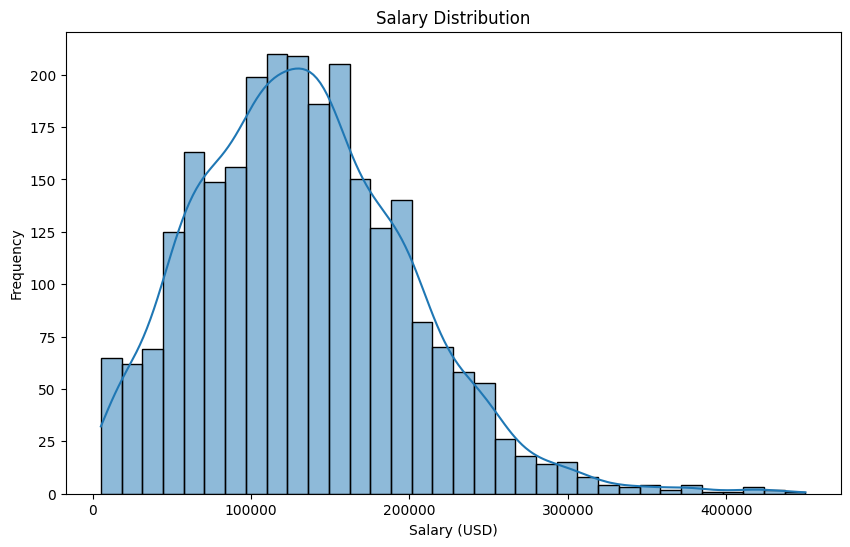

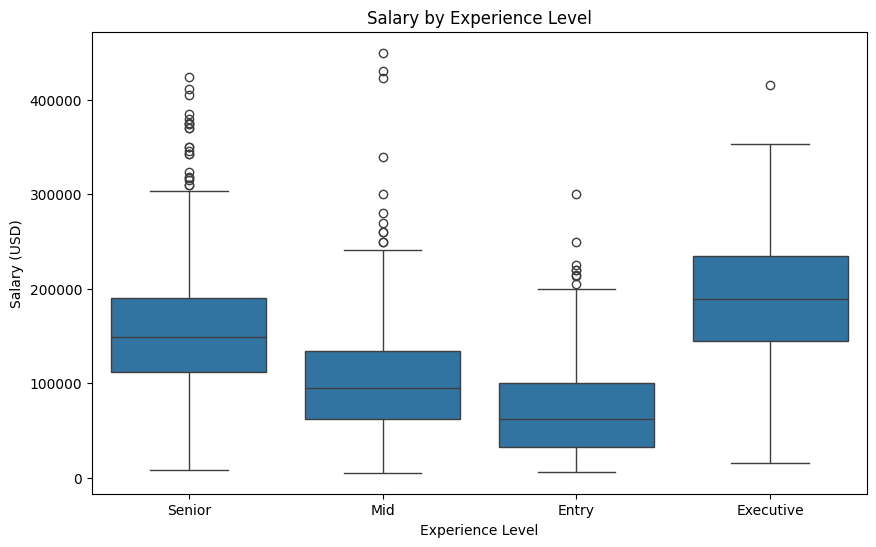

In [20]:
# 1_EDA.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/ds_salaries.csv', header=0)
print("First 5 rows:")
print(df.head())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Summary statistics
print(df.describe())

# Categorical mappings
df['experience_level'] = df['experience_level'].map({'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'})
df['employment_type'] = df['employment_type'].map({'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'})
df['company_size'] = df['company_size'].map({'S': 'Small', 'M': 'Medium', 'L': 'Large'})
df['remote_ratio'] = df['remote_ratio'].map({0: 'Onsite', 50: 'Hybrid', 100: 'Remote'})

# Rename column for clarity

df.drop(['salary_currency', 'salary'], axis=1, inplace=True, errors='ignore')

df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

# Drop raw salary and currency columns

# EDA Visuals

# Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

# Salary by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()
